<a href="https://colab.research.google.com/github/Alf-caput/LAB04_Regresion_y_agrupamiento/blob/Ldev/LAB04%20Regresion_y_agrupamientov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB04: Regresion y agrupamiento
# PRÁCTICA 2: REGRESIÓN MÚLTIPLE
##### Grupo: B05


Objetivo: construir un modelo de calidad que prediga el grado de alcohol de futuros vinos en base a diversos atributos del dataset mediante regresión lineal múltiple.

Se carga el dataset:

In [1]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

In [2]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

0

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Análisis del dataset

In [4]:
df = pd.read_csv(filename, delimiter=';')
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


La columna 'id' es innecesaria.  Se elimina.

In [5]:
df = df.drop(columns = ['id'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


No hay valores NaN y cada variable contiene 6497 observaciones.

Se pasarán quality y wine type a dummies, ya que sus valores son enteros que se refieren a distintas categorías: wine type tiene las categorías 1 y 2 y quality tiene las categorías 4, 5, 6, 7, 8, 9.

In [7]:
df2 = df.drop(columns = ['wine type','quality']) # esto se usará más adelante
df = pd.get_dummies(df, columns=['quality', 'wine type'], drop_first=True)

Se verá ahora la distribución de la variable objetivo, que es el grado de alcohol.

<ipython-input-8-8a142d8e9c97>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['alcohol'], shade=True, color='blue')


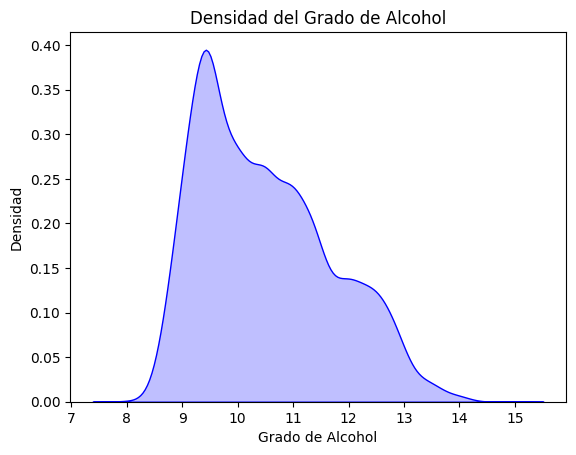

In [8]:
sns.kdeplot(df['alcohol'], shade=True, color='blue')
plt.title('Densidad del Grado de Alcohol')
plt.xlabel('Grado de Alcohol')
plt.ylabel('Densidad')
plt.show()

La variable objetivo es continua.  Toma valores desde 8 a 14.9 grados.  La mayor parte de los vinos están entre los 9 y 10 grados de alcohol.  Desde los 10 grados de alcohol, empiezan a haber menos vinos con más de 10 grados.

Esto debe tenerse en cuenta a la hora de predecir el grado de alcohol, pues hay muchos más datos con cierto grado de alcohol, como ya se ha mencionado.

Ahora se estudiará la multicolinealidad entre variables, la cual es preferible eliminar.

<ipython-input-9-0c07821b0b2e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(calidad, rotation=45)
<ipython-input-9-0c07821b0b2e>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Tipo 1', 'Tipo 2'], rotation=0)


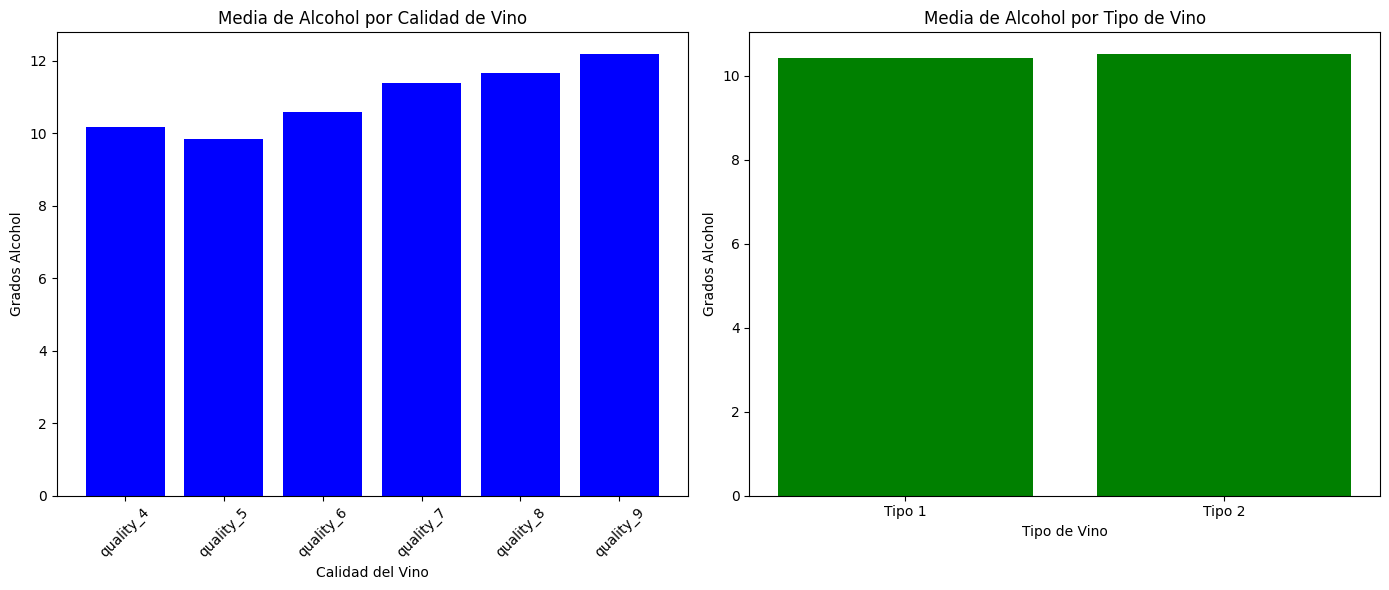

In [9]:
calidad = [f'quality_{i}' for i in range(4, 10) if f'quality_{i}' in df.columns]
media_alcohol_calidad= [df[df[label] == 1]['alcohol'].mean() for label in calidad]

tipo_vino = ['wine type_1', 'wine type_2']
media_alcohol_tipo = [df[df['wine type_2'] == (i-1)]['alcohol'].mean() for i in range(1, 3)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(calidad, media_alcohol_calidad, color='blue')
ax1.set_title('Media de Alcohol por Calidad de Vino')
ax1.set_xlabel('Calidad del Vino')
ax1.set_ylabel('Grados Alcohol')
ax1.set_xticklabels(calidad, rotation=45)

ax2.bar(tipo_vino, media_alcohol_tipo, color='green')
ax2.set_title('Media de Alcohol por Tipo de Vino')
ax2.set_xlabel('Tipo de Vino')
ax2.set_ylabel('Grados Alcohol')
ax2.set_xticklabels(['Tipo 1', 'Tipo 2'], rotation=0)

plt.tight_layout()
plt.show()


Con respecto de las variables dummy de quality y wine type, puede verse, sobre todo con wine type, que cada categoría tiene una media muy similar o igual a las demás de grado de alcohol.  Esto puede indicar una baja relación de dichas variables con la variable objetivo.

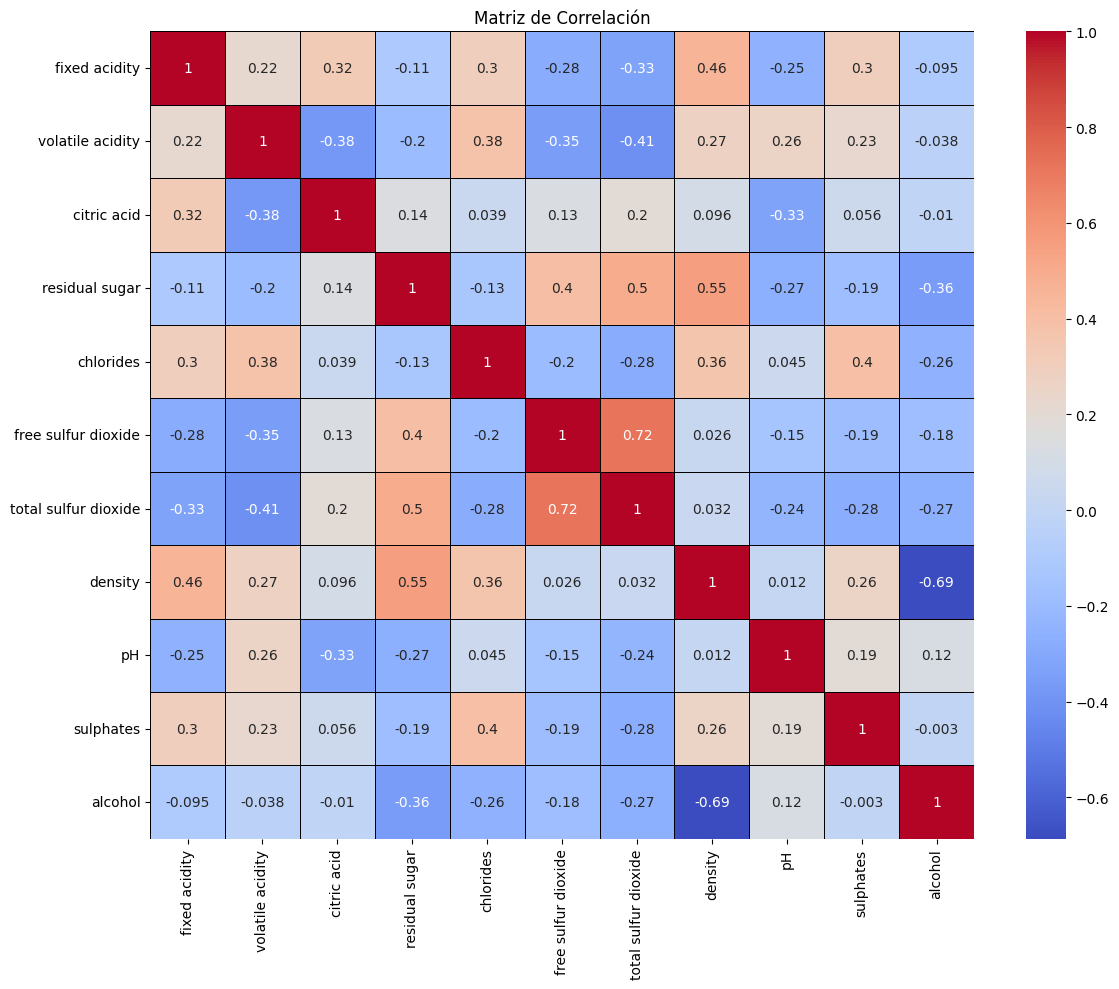

In [10]:
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Las variables más correlacionadas con 'alcohol' son 'density' y 'residual sugar', aunque se trata de una relación débil.  Las variables menos correlacionadas con 'density' son 'citric acid', 'free sulfur dioxide' y 'pH'. Los atributos menos relacionados con 'residual sugar' son 'citric acids' y 'chlorides'.  Estas pueden ser útiles, pues se evita la multicolinealidad.

In [11]:
print('Las variables más dependientes entre sí son:\n')
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= abs(0.5):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} y {var2}")


Las variables más dependientes entre sí son:

residual sugar y density
free sulfur dioxide y total sulfur dioxide


No hay correlaciones demasiado fuertes.  Tomando las correlaciones mayores o iguales a 0.5 en valor absoluto, las variables más correlacionadas son: **free sulfur dioxide** + **total sulfur dioxide** y **residual sugar** + **density**.  La primera es una correlación positiva y la tercera es negativa.


Para este modelo de regresión múltiple, se tendrán en cuenta los siguientes atributos: free sulfur dioxide, density, residual sugar, pH y citric acid, en base al previo análisis de dependencia entre variables.  También se ha añadido la variable 'wine type2', ya que al probar se ha visto una mejora razonable en el rendimiento del modelo.

Se dividen los datos en conjuntos de entrenamiento y test:

In [12]:
X = df.drop('alcohol', axis=1)
y = df['alcohol']

# División del dataset en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (4872, 17)
Tamaño del conjunto de prueba: (1625, 17)


A continuación se construye el modelo de regresión lineal múltiple.

In [13]:
atributos = df[['free sulfur dioxide','residual sugar','wine type_2', 'density','pH','citric acid','chlorides']]
objetivo = df['alcohol']
X_train, X_test, y_train, y_test = train_test_split(atributos, objetivo, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((5197, 7), (1300, 7), (5197,), (1300,))

Para hacer el aprendizaje iterativo, se empleará el método de descenso de gradiente.

In [14]:
def gradient_descent(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    # añadir intercepto
    X = np.c_[np.ones((m, 1)), X]
    # inicializar pesos
    theta = np.zeros(n + 1)
    cost_history = []

    for i in range(iterations):

        predictions = X.dot(theta)
        error = predictions - y
        # se calcula el gradiente
        gradients = 1/m * X.T.dot(error)

        theta -= lr * gradients
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history

theta, cost_history = gradient_descent(X_train_scaled, y_train, lr=0.1, iterations=5000)

theta, cost_history[-1]

(array([10.48360144, -0.13242054,  0.75548301, -0.80759087, -1.53511601,
         0.16421727,  0.25762156, -0.11194981]),
 0.22079798451919583)

El intercepto es aproximadamente 10.5, lo que indica que si hubiera un vino con todas las características del modelo igual a 0, tendría esos grados de alcohol.

In [15]:
def predict(X, theta):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    return X.dot(theta)

y_pred = predict(X_test_scaled, theta)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

0.6596250619680457

El error MSE es 0.6, lo que indica que, de media, las predicciones difieren en 0.6 grados de alcohol.

In [16]:
y_mean = np.mean(y_test)
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - y_mean) ** 2)
r_squared = 1 - (ss_res / ss_tot)

r_squared

0.6965724240505766

El R^2 es casi 0.7, por lo que el modelo puede considerarse bueno.